In [20]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

train_df = pd.read_csv('../data/02_interim/criminal_data_train_clean.csv')

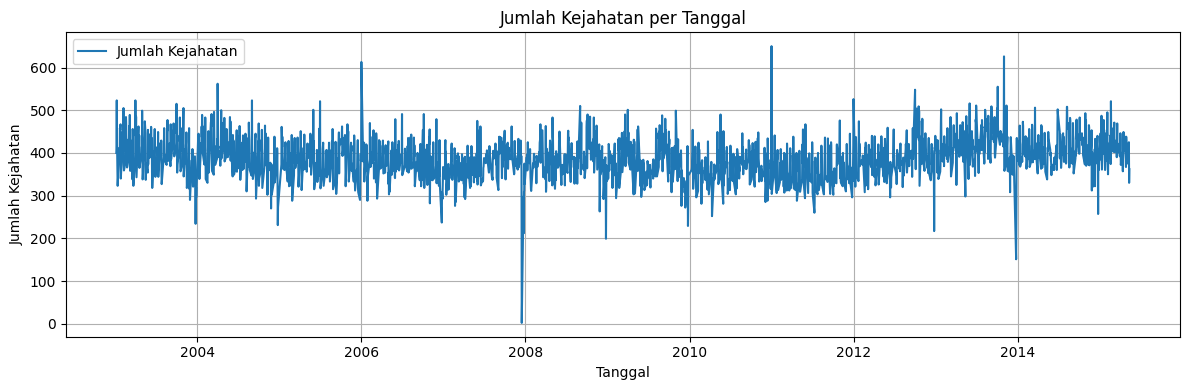

In [21]:
train_df['Dates'] = pd.to_datetime(train_df['Dates'])  
train_df['DateOnly'] = train_df['Dates'].dt.date      
crime_counts = train_df.groupby('DateOnly').size().reset_index(name='CrimeCount')

plt.figure(figsize=(12, 4))
plt.plot(crime_counts['DateOnly'], crime_counts['CrimeCount'], label='Jumlah Kejahatan')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kejahatan")
plt.title("Jumlah Kejahatan per Tanggal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


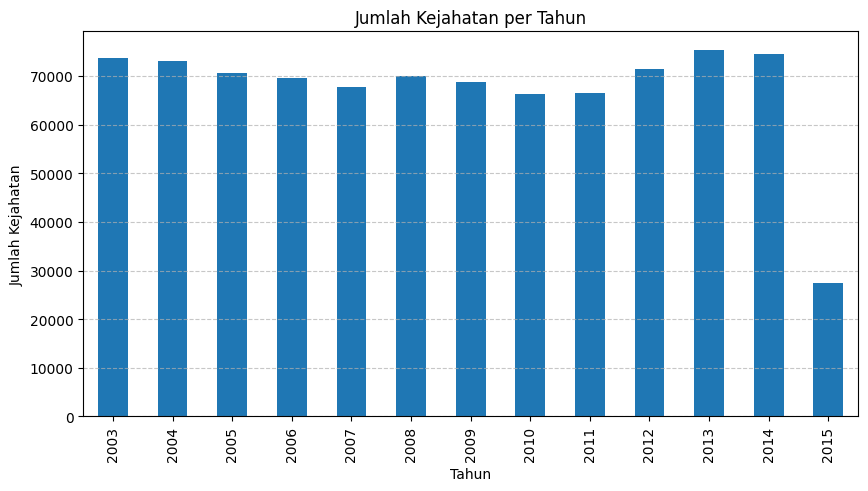

In [22]:
crimes_per_year = train_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
crimes_per_year.plot(kind='bar', title='Jumlah Kejahatan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kejahatan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

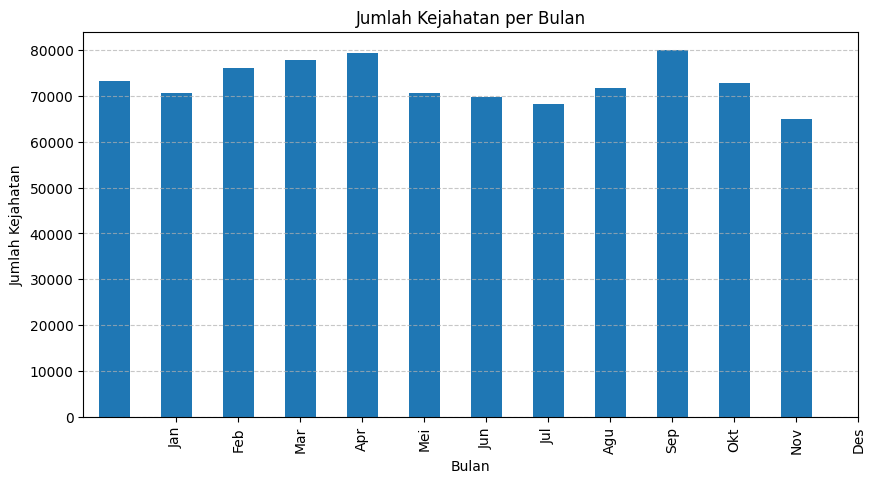

In [23]:
crimes_per_month = train_df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
crimes_per_month.plot(kind='bar', title='Jumlah Kejahatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejahatan')
plt.xticks(ticks=np.arange(12) + 1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

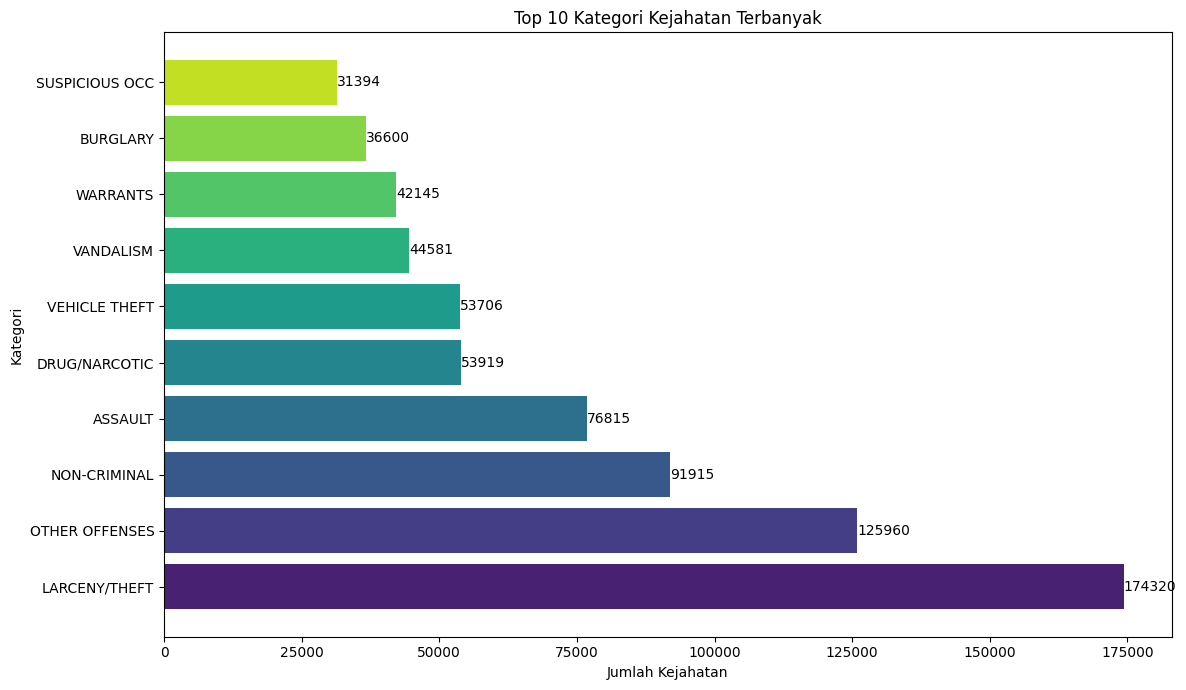

In [24]:
category_counts = train_df['Category'].value_counts().head(10)

plt.figure(figsize=(12,7))
colors = sns.color_palette('viridis', len(category_counts))

bars = plt.barh(category_counts.index, category_counts.values, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width)}', va='center')

plt.title('Top 10 Kategori Kejahatan Terbanyak')
plt.xlabel('Jumlah Kejahatan')
plt.ylabel('Kategori')
plt.tight_layout()
plt.show()


In [25]:
crime_counts['DateOnly'] = pd.to_datetime(crime_counts['DateOnly'])
crime_counts['DateOrdinal'] = crime_counts['DateOnly'].map(pd.Timestamp.toordinal)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = crime_counts[['DateOrdinal']]
y = crime_counts['CrimeCount']

In [28]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)

crime_counts['Predicted_RF'] = model_rf.predict(X)


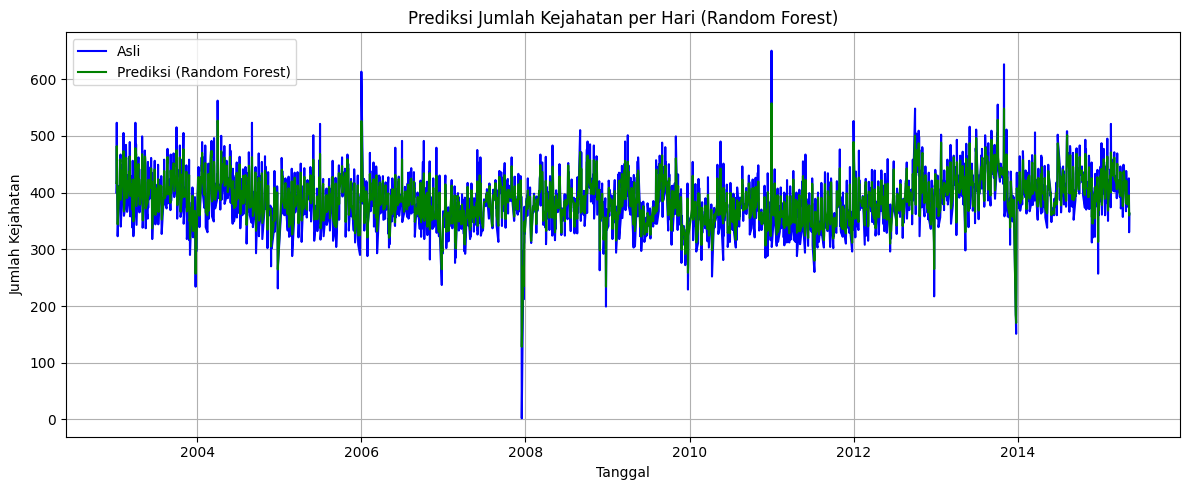

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(crime_counts['DateOnly'], y, label='Asli', color='blue')
plt.plot(crime_counts['DateOnly'], crime_counts['Predicted_RF'], label='Prediksi (Random Forest)', color='green')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kejahatan")
plt.title("Prediksi Jumlah Kejahatan per Hari (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X, y)
crime_counts['Predicted_GB'] = model_gb.predict(X)


In [36]:
print("MSE Random Forest:", mean_squared_error(y, crime_counts['Predicted_RF']))
print("MSE Gradient Boosting:", mean_squared_error(y, crime_counts['Predicted_GB']))

MSE Random Forest: 295.8618614050689
MSE Gradient Boosting: 1542.8843799894503


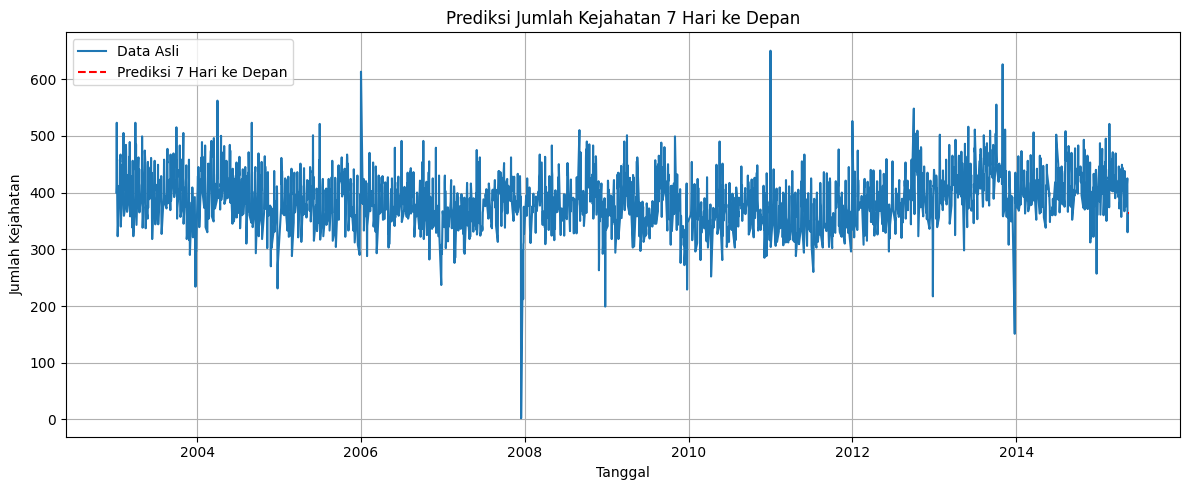

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Prediksi ke depan
last_date = crime_counts['DateOrdinal'].max()
future_dates = pd.DataFrame({
    'DateOrdinal': [last_date + i for i in range(1, 8)]
})

# Gunakan model Random Forest
future_preds = model_rf.predict(future_dates)

# Konversi kembali ke format tanggal dari kolom 'DateOrdinal'
future_dates_dt = [pd.Timestamp.fromordinal(int(d)) for d in future_dates['DateOrdinal']]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(crime_counts['DateOnly'], crime_counts['CrimeCount'], label='Data Asli')
plt.plot(future_dates_dt, future_preds, label='Prediksi 7 Hari ke Depan', linestyle='--', color='red')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Kejahatan")
plt.title("Prediksi Jumlah Kejahatan 7 Hari ke Depan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
